# Dense Coding

## 2 bits from a Qubit

Let's start this question with the standard SuperDense Coding protocol, given in QCQI (page 97), which uses a *maximally* entangled two-qubit state 

$$\left(\frac{|00\rangle + |11\rangle}{\sqrt{2}}\right)\$$

to allow Alice to transmit 2 bits of information to Bob, by sending her qubit to Bob.

Describe the protocol briefly in your own words. Since this is an SoC and requires coding (*wink wink*), code up the circuit in Qiskit. 

Specifically, code up a circuit which changes depending on the message (of two bits) being transferred (you can pass the circuit and the message as parameters to a function, for example)

# Protocol
The protocol for 2 qubit superdense coding involves:

1. First the two parties recieve a single qubit from a two qubit entangled state created by some other party.$$\frac{\ket{00} + \ket{11}}{\sqrt{2}} $$
2. Second Alice somehow manipulates the qubit in her possesion to convert the complete state into one of the **four EPR states** and sends her qubit over to Bob
3. Bob now has the complete state. He performs some operations on the qubit (A Hadamard gate and a CNOT), and then measures the state to get the two qubit of classical information 


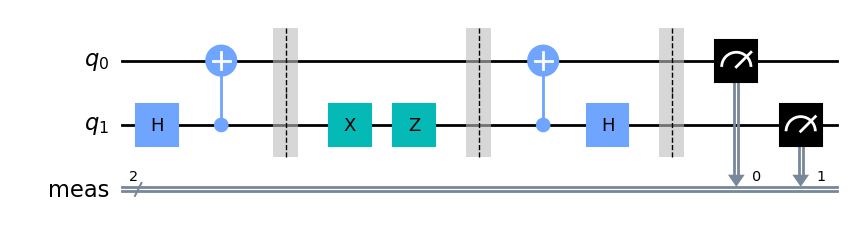

In [38]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

m = '11'
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)
qc.barrier()
if m[1] == '1':
    qc.x(1)
if m[0] == '1':
    qc.z(1)
qc.barrier()
qc.cx(1, 0)
qc.h(1)
qc.measure_all()
qc.draw(output = 'mpl')



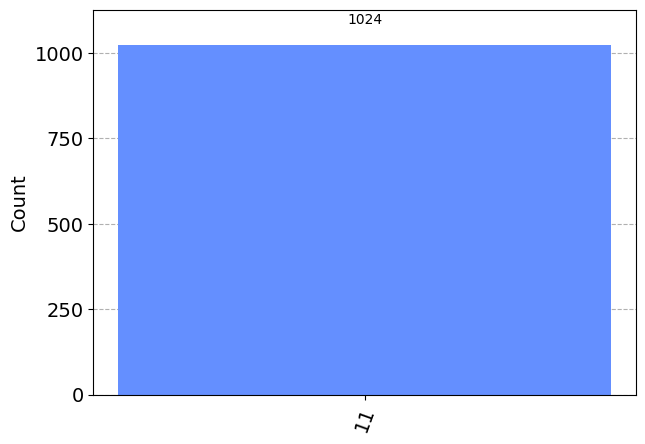

In [33]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Transmitting 3 bits

You've now transmitted 2 bits successfully using a quantum channel. What else can we do?

Suppose Alice and Bob now share a 3 qubit entangled state, with Alice having 2 out of the 3 qubits. Their goal is to transmit 3 bits, using those 3 qubits. 

1. Propose a 3 qubit state which would suit Alice and Bob. Take inspiration from the previous part, and why you think the protocol for 2 qubits works.

2. Now that you have a shared state, design a protocol, that allows Alice to transmit a 3 bit message, by sending her 2 qubits to Bob. You can also code it up on Qiskit, with the same specifications as the previous coding task.

Write about the state and the protocol here : 

# 3-Qubit Superdense Coding 
The protocol here is very similar to the twio qubit superdense coding the only difference here is that instead of using the four EPR states we make use of the **8 GHZ** states.  Alice manipulates the two qubits in her ppossesion to convert the initial state(given by the third party):  $$\frac{\ket{000} + \ket{111}}{\sqrt{2}} $$ is manipulated by alice to convert into other 7 GHZ states (by applying X and Z Puali gates at suitable places). Bob can later decode them(by using two CNOT gates and one Hadamard Gate) and then measure them to get the 3 classical bits.

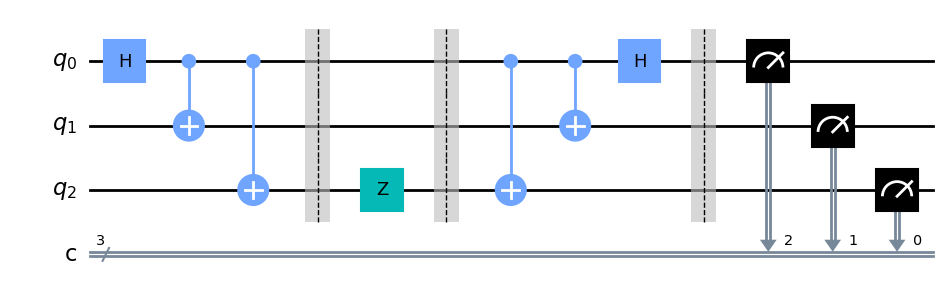

In [47]:
# Write your code for the protocol below
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

m = '100'

circuit = QuantumCircuit(3, 3)
circuit.h(0) #creating GHZ state
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.barrier()
if m[1] == '1': #Encoding
    circuit.x(1)
if m[2] == '1':
    circuit.x(2)
if m[0] == '1':
    circuit.z(2)
circuit.barrier()

circuit.cx(0, 2)
circuit.cx(0, 1)
circuit.h(0) #decoding
circuit.barrier()
#measuring
circuit.measure(0, 2)
circuit.measure(1, 1)
circuit.measure(2, 0)
circuit.draw(output='mpl')

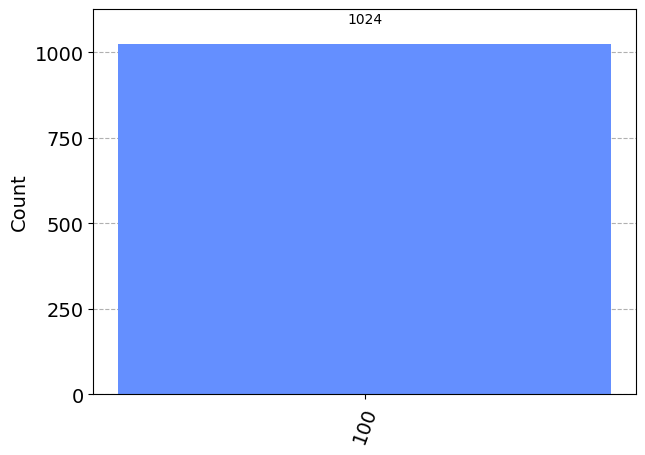

In [48]:
sim = Aer.get_backend('aer_simulator') 
results = sim.run(circuit).result().get_counts()
plot_histogram(results)

3. Suppose Bob wanted to send some information to Alice. Show that he can't design a protocol to send more than 2 qubits of information with the 1 qubit he can send.

## Answer
It is not possible to perform superdense coding and send 3 bits of information beacuse on performing a Unitary operation on the first qubit we can get atmax 4 new states that is by doing $\ket{0}\rightarrow\ket{0}$,  $\ket{0}\rightarrow\ket{1}$,  $\ket{0}\rightarrow -\ket{0}$,  $\ket{0}\rightarrow -\ket{1}$. So atmax only 4 GHZ states can eb prepared , but we need 8 GHZ states for complete transfer. So this can't be used.

## Doing Better

You might have seen that we're transmitting 2 qubits to send 3 bits of information here, which is less efficient than transmitting 1 qubit to get 2 bits of information.

An obvious way to do better is to do the previous protocol twice, and get 4 bits of information for the two qubits transferred.

Can you think of a way to achieve this, in a similar line to the previous methods, but with one common shared state (and not two separate Bell states)?

Hint : Think of a 4 qubit state to share, and see if Alice, with her two qubits, can operate her qubits in different ways so as to get other basis states